In [22]:
import requests
import numpy as np
import matplotlib.pyplot as plt


In [27]:
payload = {'smiles': 'COCC'}
response = requests.post('http://localhost:8091/BE', params=payload)

In [28]:
BEs = response.json()['BE']
print(BEs)

[292.5514558912255, 292.62671979656443, 290.7631269400008]


Text(0.5, 1.0, 'Sigma 0.35')

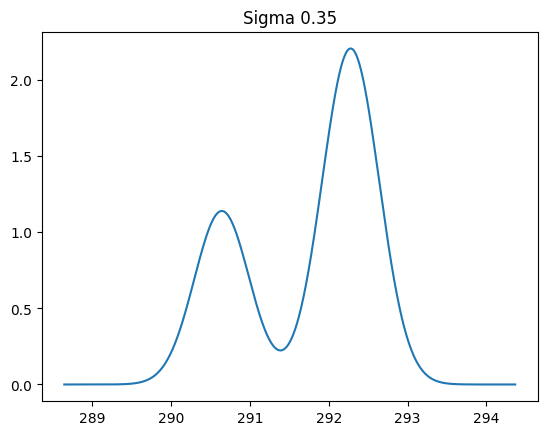

In [29]:
payload = {'smiles': 'COCC', 
           'sigma': 0.35
           }

response = requests.post('http://localhost:8091/spectrum', params=payload).json()
plt.plot(response['energies'], response['intensities'])
plt.title(f'Sigma {response["sigma"]}')


In [ ]:
def plot_val(values, sigma, plot = True):
    def g(BE_sweep, BE_max, σ):
        G = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(BE_sweep-BE_max)**2 / (2*sigma**2))
        new_y= np.array(G)
        return new_y

    # Calculate mean and standard deviation
    mean = np.mean(values)
    std_dev = np.std(values)
    # Create a range of x values for the plot
    x = np.linspace(min(values) - 2, max(values) + 2, 1000)

    # Plot Gaussian curves for each center value
    #plt.figure(figsize=(8, 6))
    gaussian=0
    for val in values:
        gaussian += g(x,val,sigma)
    return x, gaussian

x,y = plot_val(BEs, 0.35)

(289.0, 294.0)

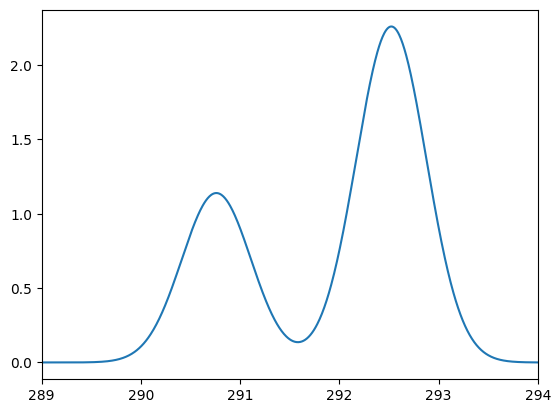

In [ ]:
plt.plot(x,y)
plt.xlim(289, 294)